In [76]:
# COVID-19 Time Series Prediction


In [ ]:

### Dependencies importing


In [ ]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [77]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [78]:
data_index=pd.read_csv('../data/out_csv/index_France.csv')

In [79]:
data_index=data_index.set_index('date')

In [80]:
data_index.head(20)

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,
2020-02-15,0.026779,0.012400,0.0,12.0,1.0,1.0,1.0,0.023908,0.0,0.0,0.0,0.0
2020-02-16,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-17,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-18,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-19,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-20,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-21,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-22,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0
2020-02-23,0.026779,0.012400,0.0,12.0,0.0,1.0,0.0,0.023908,0.0,0.0,0.0,0.0


In [81]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.tail()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2022-09-07,0.0,0.0,0.0,33679416.0,20142.0,150902.0,46.0,0.05093,149538407.0,54554576.0,...,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0,150524.0,150414.0
2022-09-08,0.0,0.0,0.0,33699282.0,19866.0,150960.0,58.0,0.05093,149566662.0,54555124.0,...,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0,150524.0
2022-09-09,0.0,0.0,0.0,33718369.0,19087.0,150991.0,31.0,0.05093,0.0,0.0,...,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0,150575.0
2022-09-10,0.0,0.0,0.0,33718369.0,0.0,150991.0,0.0,0.05093,0.0,0.0,...,150991.0,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0,150629.0
2022-09-11,0.0,0.0,0.0,33718369.0,0.0,150991.0,0.0,0.05093,0.0,0.0,...,150991.0,150991.0,150960.0,150902.0,150856.0,150796.0,150712.0,150712.0,150712.0,150670.0


In [82]:
data_index=data_index.fillna(0)

In [83]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [84]:
X_up=X.copy()

In [85]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [88]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

In [89]:
country='France'

In [92]:
model =SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [91]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
best=grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


KeyboardInterrupt: 

In [93]:
best

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [94]:
model=best
model.fit(X_train,y_train)

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [ ]:
country='France'

In [ ]:
path='/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models'

In [57]:
with open(f'{path}/model_{country}.pkl','wb') as f:
    pickle.dump(model, f)

In [95]:
y_pred=model.predict(X_test)

In [96]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.004160242175729621

In [25]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'gov_response', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'day-1', 'day-2', 'day-3',
       'day-4', 'day-5', 'day-6', 'day-7', 'day-8', 'day-9', 'day-10'],
      dtype='object')

In [97]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [98]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998357,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,0.998741,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,0.999045,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,0.999443,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,1.000000,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,1.000000,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
min_num=min(y)
max_num=max(y)

In [111]:
y_test.tail(1).values[0]

150991.0

In [100]:
list_pred=[]

    
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[0]).T))
print(y_pred_)
print(y_train.tail(1))
if (y_pred_ < y_train.tail(1).tolist())[0]:
        y_pred_=y_train.tail(1)
        y_pred_2=y_train.tail(1)
else:
    y_pred_2=y_pred_
    
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(1,10):
    
    X_predict.loc[j,f'day-{j}']=y_pred_scale
    print(j)
    print(y_pred_scale)
    
    
y_pred_ = np.round(model.predict(pd.DataFrame(X_predict.loc[1]).T))
if y_pred_ < y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
    
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(2,10):
    X_predict.loc[j,f'day-{j-1}']=y_pred_scale
    print(j)
    print(y_pred_scale)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[2]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(3,10):
    X_predict.loc[j,f'day-{j-2}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[3]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(4,10):
    X_predict.loc[j,f'day-{j-3}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[4]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(5,10):
    X_predict.loc[j,f'day-{j-4}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[5]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(6,10):
    X_predict.loc[j,f'day-{j-5}']=y_pred_scale
    print(y_pred_scale)
    print(j)
    
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[6]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)

for j in range(7,10):
    X_predict.loc[j,f'day-{j-6}']=y_pred_scale
    print(y_pred_scale)
    print(j)
y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[7]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num)) 
list_pred.append(y_pred_)

for j in range(8,1):
    X_predict.loc[j,f'day-{j-7}']=y_pred_scale
    print(y_pred_scale)
    print(j)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[8]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
list_pred.append(y_pred_)
for j in range(9,10):
    X_predict.loc[j,f'day-{j-8}']=y_pred_scale
    print(y_pred_scale)
    print(j)

y_pred_=np.round(model.predict(pd.DataFrame(X_predict.loc[8]).T))
if y_pred_< y_pred_2:
    y_pred_=y_pred_2
else:
    y_pred_2=y_pred_
list_pred.append(y_pred_)

  
    

X_predict   

[150716.]
date
2022-08-27    150414.0
Name: total_deaths, dtype: float64
1
[0.99817869]
2
[0.99817869]
3
[0.99817869]
4
[0.99817869]
5
[0.99817869]
6
[0.99817869]
7
[0.99817869]
8
[0.99817869]
9
[0.99817869]
2
[0.99848334]
3
[0.99848334]
4
[0.99848334]
5
[0.99848334]
6
[0.99848334]
7
[0.99848334]
8
[0.99848334]
9
[0.99848334]
[0.99878138]
3
[0.99878138]
4
[0.99878138]
5
[0.99878138]
6
[0.99878138]
7
[0.99878138]
8
[0.99878138]
9
[0.99905954]
4
[0.99905954]
5
[0.99905954]
6
[0.99905954]
7
[0.99905954]
8
[0.99905954]
9
[0.99929134]
5
[0.99929134]
6
[0.99929134]
7
[0.99929134]
8
[0.99929134]
9
[0.99951652]
6
[0.99951652]
7
[0.99951652]
8
[0.99951652]
9
[0.99972184]
7
[0.99972184]
8
[0.99972184]
9
[0.99992715]
9


/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998179,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998483,0.998179,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998781,0.998483,0.998179,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999060,0.998781,0.998483,0.998179,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999291,0.999060,0.998781,0.998483,0.998179,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999927,1.000000,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,1.000000


In [49]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998179,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998483,0.998179,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998781,0.998483,0.998179,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999060,0.998781,0.998483,0.998179,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999291,0.999060,0.998781,0.998483,0.998179,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999927,1.000000,0.999722,0.999517,0.999291,0.999060,0.998781,0.998483,0.998179,1.000000


In [53]:
list_pred

[array([150716.]),
 array([150762.]),
 array([150807.]),
 array([150849.]),
 array([150884.]),
 array([150918.]),
 array([150949.]),
 array([150964.]),
 array([150980.]),
 array([150980.])]

In [54]:

y_test

date
2022-08-28    150414.0
2022-08-29    150524.0
2022-08-30    150575.0
2022-08-31    150629.0
2022-09-01    150670.0
2022-09-02    150712.0
2022-09-03    150712.0
2022-09-04    150712.0
2022-09-05    150796.0
2022-09-06    150856.0
2022-09-07    150902.0
2022-09-08    150960.0
2022-09-09    150991.0
2022-09-10    150991.0
2022-09-11    150991.0
Name: total_deaths, dtype: float64

In [59]:
prediction=pd.DataFrame(list_pred)
prediction

,0
0,150716.0
1,150762.0
2,150807.0
3,150849.0
4,150884.0
5,150918.0
6,150949.0
7,150964.0
8,150980.0
9,150980.0


Text(0.5, 0, 'Date')

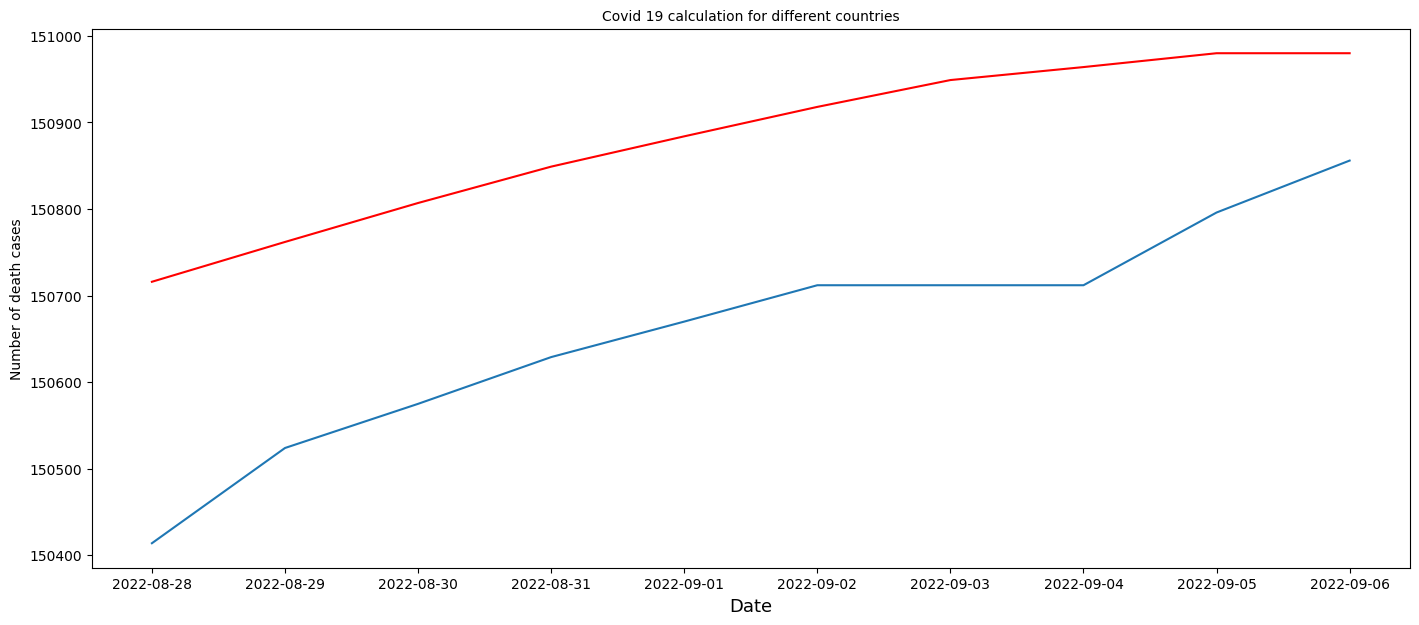

In [60]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:10],prediction,color='r');
plt.plot(y_test.index[:10],y_test[:10]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)